In [311]:
# To read .csv files
import pandas as pd
# To work on arrays
import numpy as np
# To change string to datetime object
from datetime import datetime

pd.set_option('display.max_rows', 500)


# Data Preparation

- prepare the data which has been collected from various sources
- show visual graphs or tables after each step

## John Hopkins data from GITHUB repository

In [312]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [313]:
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [314]:
# Panda library requires to specify the date as date-type
# Getting the columns
time_idx = pd_raw.columns[4:]

In [315]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/10/20', '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20',
       '5/16/20', '5/17/20', '5/18/20', '5/19/20'],
      dtype='object', length=119)

In [316]:
# Coverting the columns into rows
df_plot = pd.DataFrame({'date':time_idx})

In [317]:
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [318]:
# No. of individual countries
len(pd_raw['Country/Region'].unique())

188

In [319]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [320]:
# Searching by individual country name
# Date in one column and infected people in the other column
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [321]:
# Starting with small data set- small number of countries
country_list = ['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South'
             ] 

In [322]:
for each in country_list:
    # each country gets a new column
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

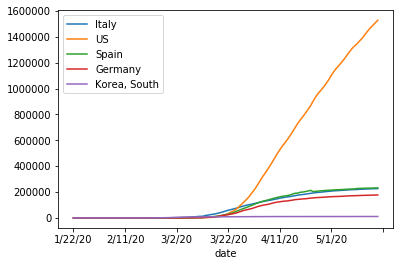

In [323]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [324]:
# Cleaning up the above plot
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [325]:
# Converting date string to datetime object
df_plot.date[0]

'1/22/20'

In [326]:
datetime.strptime(df_plot.date[0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [327]:
time_idx = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.date]

In [328]:
# Converting the date to ISO standard yyyy/mm/dd
# strftime - object back to string
# ISO norm can be read by other 
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]

In [329]:
# Inserting the changed format to date in the table
df_plot['date'] = time_idx

In [330]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [331]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';', index=False)

## Relational data model - defining a primary key

In [332]:
# Data and time move over time while Latitude and longitude dont
data_path = data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [333]:
# Changing column titles to lowercase
pd_data_base = pd_raw.rename(columns={'Country/Region' : 'country','Province/State' : 'state'})
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [334]:
# Changing state = "NaN" to "no"
pd_data_base['state'] = pd_data_base['state'].fillna('no')

In [335]:
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,no,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,no,Albania,41.1533,20.1683,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,no,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,no,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,no,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [336]:
# Dropping the latitude and longitude as they are unnecessary
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis=1)

In [337]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,no,Albania,0,0,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,no,Algeria,0,0,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,no,Andorra,0,0,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,no,Angola,0,0,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [338]:
try_1 = pd_data_base.set_index(['state', 'country']).T
try_1.head()

state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state       no Falkland Islands (Malvinas) Saint Pierre and Miquelon  \
country Malawi              United Kingdom                    France   
1/22/20      0                           0                         0   
1/23/20      0                           0                         0   
1/24/20      0                           0                         0   
1/25/20      0                           0                         0   
1/26/20      0                           0                         0   

state            no                                                     \
country South Sudan Western Sahara Sao Tome and Principe Yemen Comoros   
1/22/20           0              0                     0     0       0   
1/23/20           0              0                     0     0       0   
1/24/20           0              0                     0     0       0   
1/25/20           0              0                     0     0       0   
1/26/20           0              0                     0     0       0   

state                       
country Tajikistan Lesotho  
1/22/20          0       0  
1/23/20          0       0  
1/24/20          0       0  
1/25/20          0       0  
1/26/20          0       0  

[5 rows x 266 columns]

In [339]:
try_2 = try_1.stack(level=[0,1])

In [340]:
try_2.head()

         state                         country       
1/22/20  Alberta                       Canada            0.0
         Anguilla                      United Kingdom    0.0
         Anhui                         China             1.0
         Aruba                         Netherlands       0.0
         Australian Capital Territory  Australia         0.0
dtype: float64

In [341]:
pd_relational_model = try_2.reset_index()\
.rename(columns={'level_0':'date', 0:'confirmed'})
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [342]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [343]:
# Changing 'date' string-object to date-object
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [344]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [345]:
# Changing 'confirmed' from float to int
pd_relational_model['confirmed'] = pd_relational_model.confirmed.astype(int)
pd_relational_model.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,Anguilla,United Kingdom,0
2,2020-01-22,Anhui,China,1
3,2020-01-22,Aruba,Netherlands,0
4,2020-01-22,Australian Capital Territory,Australia,0


In [346]:
# Viewing the data stats for US
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
30576 2020-05-15    no      US    1442824
30842 2020-05-16    no      US    1467820
31108 2020-05-17    no      US    1486757
31374 2020-05-18    no      US    1508308
31640 2020-05-19    no      US    1528568


In [347]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

## US State data is processed now

In [348]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US = pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,151,151,152,152,152,154,154,154,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,16,19,19,19,19,19,21,21,21,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,69,69,69,69


In [349]:
# Transactional data - changes with time
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US = pd_raw_US.rename(columns={'Province_State' : 'state'}).copy()
pd_data_base_US.head()

,state,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,151,151,152,152,152,154,154,154,154,154
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,16,19,19,19,19,19,21,21,21,21
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,69,69,69


In [350]:
# Working on the data structure to bring to date/state/confirmed/country
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                       )
pd_relational_model_US.head()

,date,state,confirmed
0,1/22/20,American Samoa,0
1,1/22/20,Guam,0
2,1/22/20,Northern Mariana Islands,0
3,1/22/20,Puerto Rico,0
4,1/22/20,Virgin Islands,0


In [351]:
# Some more changes to the data
pd_relational_model_US['country'] = 'US'
pd_relational_model_US

,date,state,confirmed,country
0,1/22/20,American Samoa,0,US
1,1/22/20,Guam,0,US
2,1/22/20,Northern Mariana Islands,0,US
3,1/22/20,Puerto Rico,0,US
4,1/22/20,Virgin Islands,0,US
...,...,...,...,...
388054,5/19/20,Utah,30,US
388055,5/19/20,Utah,16,US
388056,5/19/20,Utah,245,US
388057,5/19/20,Utah,19,US


In [352]:
# Have to change the date structure
pd_relational_model_US['date'] = [datetime.strptime(each, "%m/%d/%y") for each in pd_relational_model_US.date]
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,American Samoa,0,US
1,2020-01-22,Guam,0,US
2,2020-01-22,Northern Mariana Islands,0,US
3,2020-01-22,Puerto Rico,0,US
4,2020-01-22,Virgin Islands,0,US


In [353]:
# Add this date to pd_relational_model
pd_relational_model_all = pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)
pd_relational_model_all.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,Anguilla,United Kingdom,0
2,2020-01-22,Anhui,China,1
3,2020-01-22,Aruba,Netherlands,0
4,2020-01-22,Australian Capital Territory,Australia,0


In [354]:
# Join two columns
pd_relational_model_all = pd.concat([pd_relational_model_all, pd_relational_model_US], ignore_index=True)
pd_relational_model_all.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,Anguilla,United Kingdom,0
2,2020-01-22,Anhui,China,1
3,2020-01-22,Aruba,Netherlands,0
4,2020-01-22,Australian Capital Territory,Australia,0


In [355]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date                     state country  confirmed
31535  2020-01-22            American Samoa      US          0
31536  2020-01-22                      Guam      US          0
31537  2020-01-22  Northern Mariana Islands      US          0
31538  2020-01-22               Puerto Rico      US          0
31539  2020-01-22            Virgin Islands      US          0
...           ...                       ...     ...        ...
419589 2020-05-19                      Utah      US         30
419590 2020-05-19                      Utah      US         16
419591 2020-05-19                      Utah      US        245
419592 2020-05-19                      Utah      US         19
419593 2020-05-19                      Utah      US        234

[388059 rows x 4 columns]


In [356]:
# US states data is now attached to pd_relational_model_all 
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv', sep=';', index=False)

## Check the US full sum data

In [357]:
# Saving the US data in check_US
check_US = pd_relational_model_all[pd_relational_model_all['country']=='US']#

In [358]:
# Group by the string data to the integer data 
check_US[['date', 'country', 'confirmed']].groupby(['date', 'country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5
